In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dropout,Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model

import datetime as time

Get data from Yahoo Finance(yfinance)

In [3]:
data=yf.download("BTC-USD",start='2014-09-17',stop=time.date.today())

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2.978000e+03
mean,12792.171901,13118.899248,12426.427935,12796.305041,12796.305041,1.626264e+10
std,16317.511730,16736.059129,15832.867929,16312.584090,16312.584090,2.011835e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,662.439987,673.016006,653.470764,663.579010,663.579010,9.658567e+07
50%,6873.440430,7110.560059,6712.544922,6881.140869,6881.140869,6.903790e+09
75%,15894.289551,16519.219727,15220.829834,15936.885986,15936.885986,2.805912e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


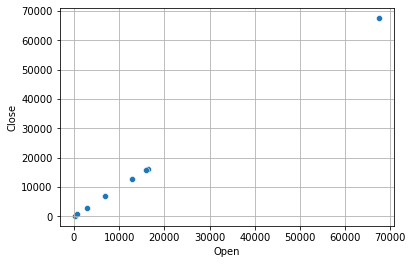

In [7]:
sb.scatterplot(data.describe()["Open"],data.describe()["Close"],);
plt.grid()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2978 entries, 2014-09-17 to 2022-11-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2978 non-null   float64
 1   High       2978 non-null   float64
 2   Low        2978 non-null   float64
 3   Close      2978 non-null   float64
 4   Adj Close  2978 non-null   float64
 5   Volume     2978 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 162.9 KB


Text(1.0, 1.0, 'low values')

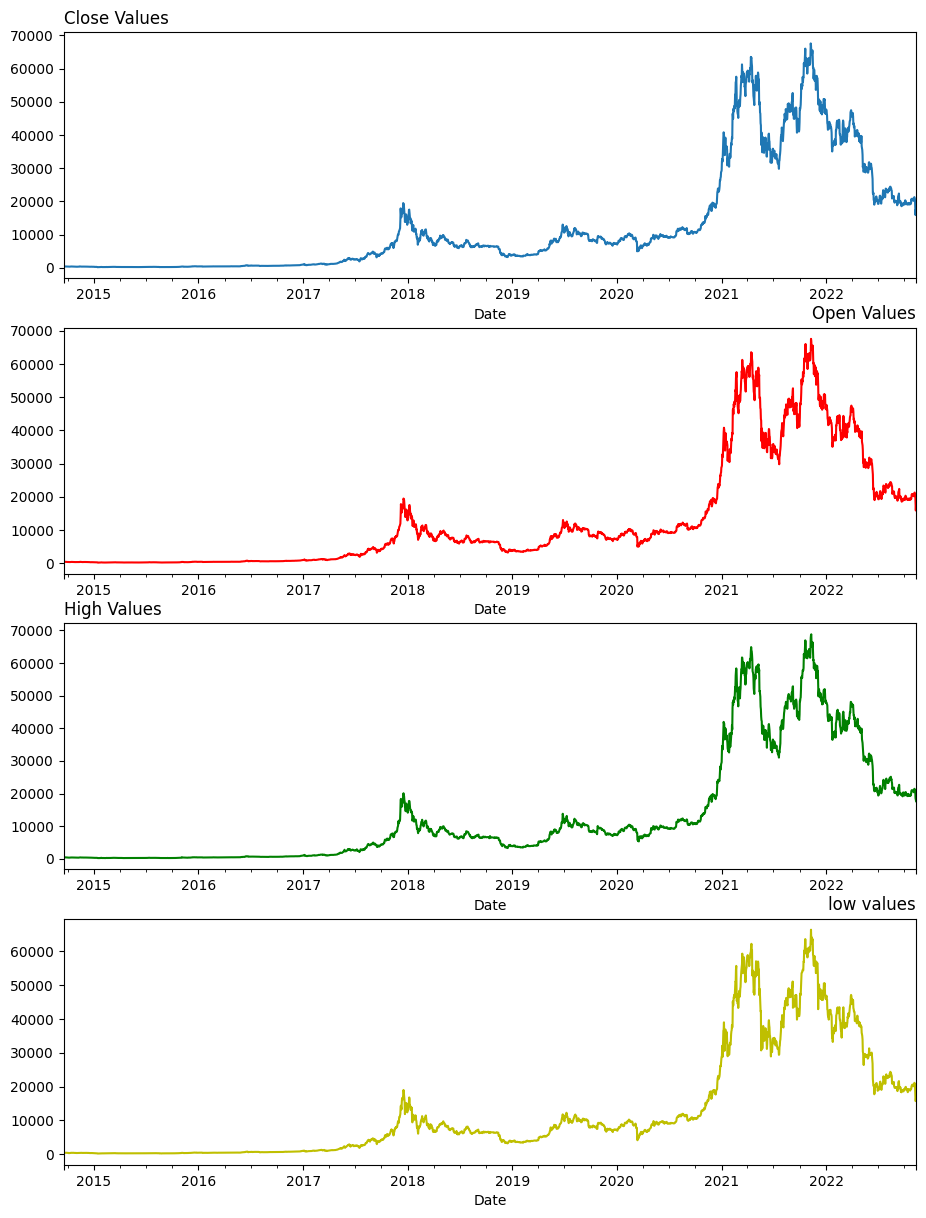

In [9]:
plt.figure(figsize=(11,15),dpi=100)
plt.subplot(411)
data.Close.plot()
plt.title("Close Values",loc="left")
plt.subplot(412)
data.Open.plot(c="r")
plt.title("Open Values",loc="right")
plt.subplot(413)
data.High.plot(c="g")
plt.title("High Values",loc="left")
plt.subplot(414)
data.Low.plot(c="y")
plt.title("low values",loc="right")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


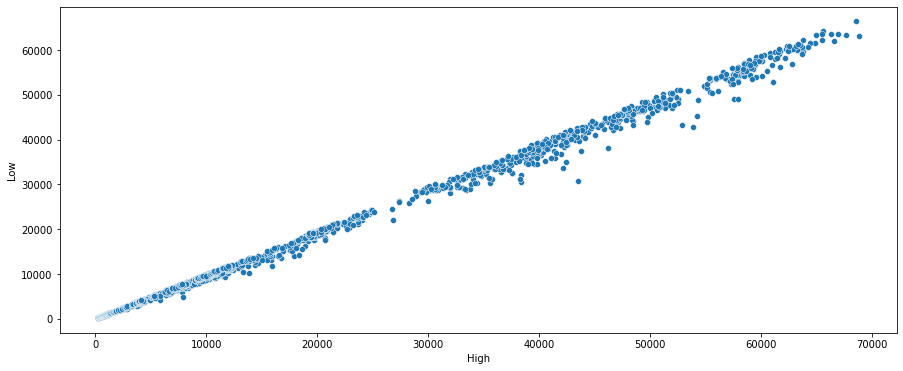

In [10]:
plt.figure(figsize=(15,6))
sb.scatterplot(data.High,data.Low)

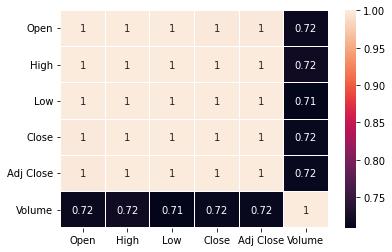

In [12]:
sb.heatmap(data.corr(),annot=True,linewidths=0.01)

In [13]:
x=data.drop("Close",axis=1)
y=data.Close
x_full_train,x_test,y_full_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
x_train,x_val,y_train,y_val=train_test_split(x_full_train,y_full_train,test_size=0.2)

In [15]:
model=Sequential()
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(50,activation="linear"))
model.add(BatchNormalization())
model.add(Dense(40,activation="relu"))
model.add(Dense(1,activation="linear"))

In [17]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [18]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/100
60/60 [==============================] - 1s 5ms/step - loss: 418373088.0000 - val_loss: 428731072.0000
Epoch 2/100
60/60 [==============================] - 0s 2ms/step - loss: 417749792.0000 - val_loss: 426728352.0000
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 416048640.0000 - val_loss: 422949504.0000
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 412847168.0000 - val_loss: 418016320.0000
Epoch 5/100
60/60 [==============================] - 0s 2ms/step - loss: 407609024.0000 - val_loss: 411449952.0000
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 400078944.0000 - val_loss: 401957184.0000
Epoch 7/100
60/60 [==============================] - 0s 2ms/step - loss: 389832608.0000 - val_loss: 390711168.0000
Epoch 8/100
60/60 [==============================] - 0s 2ms/step - loss: 377391424.0000 - val_loss: 375927680.0000
Epoch 9/100
60/60 [==============================] - 0s 2ms/step - loss: 3611500

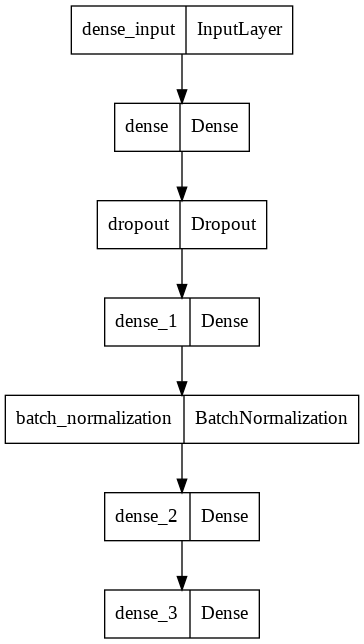

In [19]:
plot_model(model)

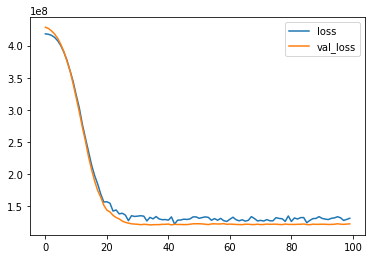

In [20]:
pd.DataFrame(history.history).plot()

In [21]:
y_pred=model.predict(x_test)

19/19 [==============================] - 0s 1ms/step


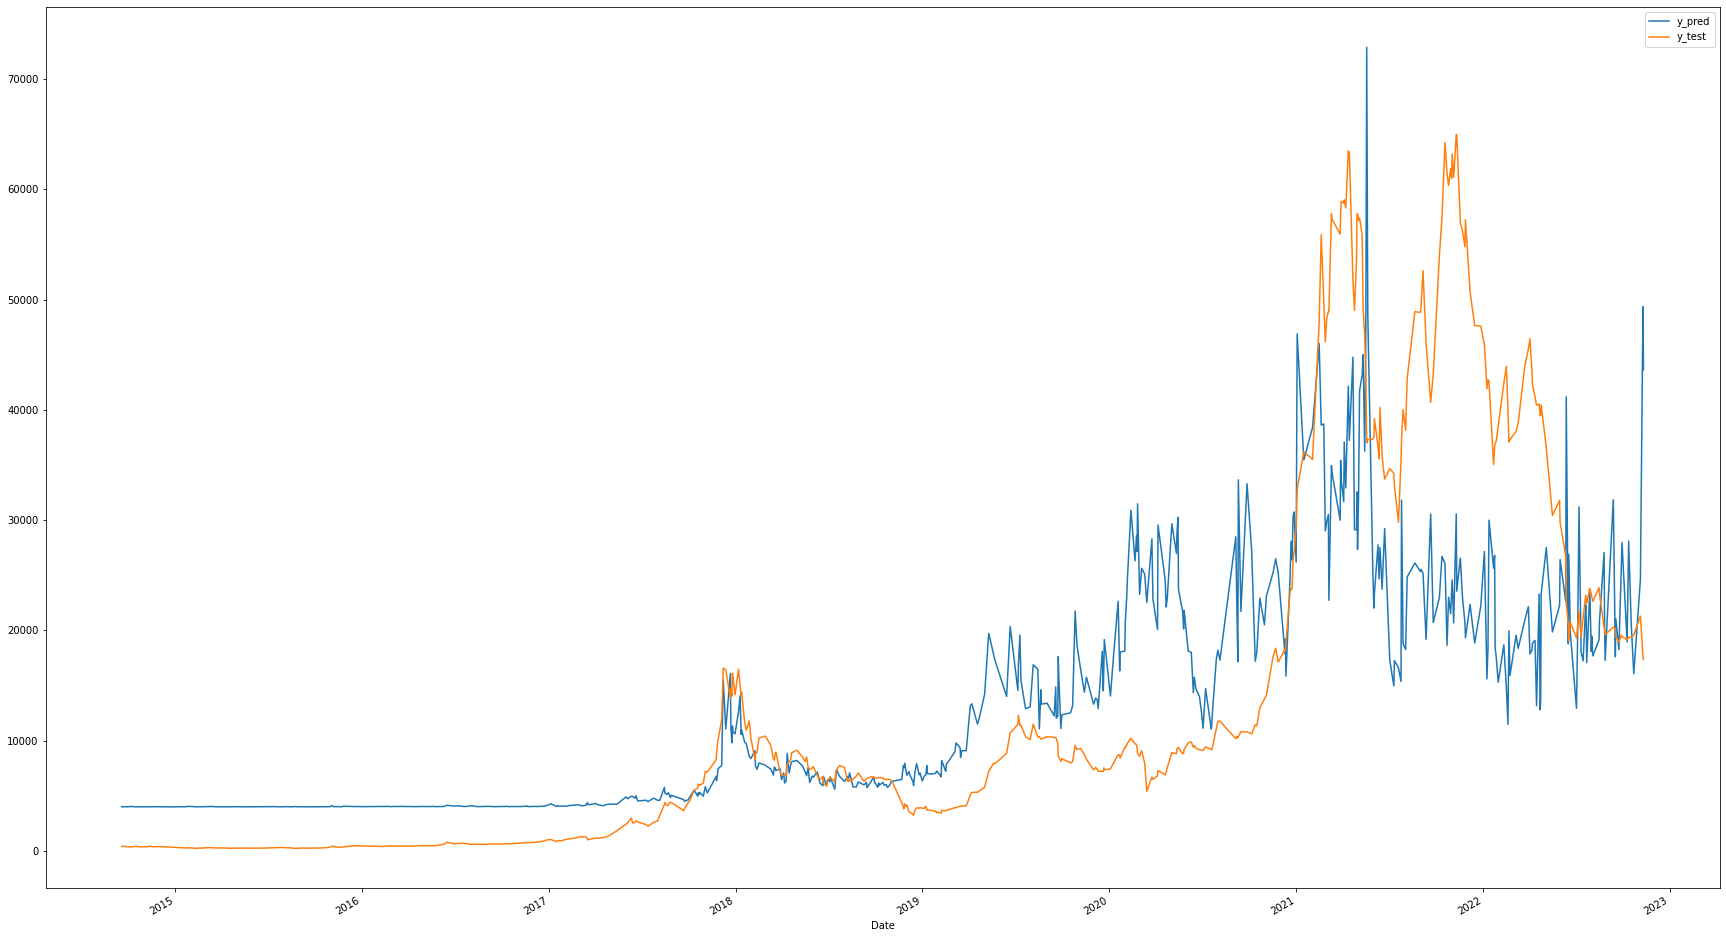

In [27]:
y_=pd.DataFrame(data=y_pred,index=y_test.index,columns=["y_pred"])
y_["y_test"]=y_test.values
y_.plot(figsize=(30,18))